In [1]:
import timeit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model

X, y = datasets.load_diabetes(return_X_y=True)
raw = X[:, None, 2]

Detalles del data set: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html

#### Reglas de escalamiento

(array([32., 66., 98., 90., 64., 50., 23., 12.,  5.,  2.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

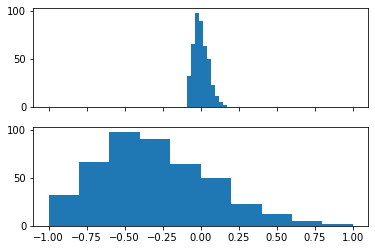

In [3]:
max_raw = max(raw)
min_raw = min(raw)
scaled = (2*raw - max_raw - min_raw)/(max_raw - min_raw)

fig, axs = plt.subplots(2, 1, sharex = True)

axs[0].hist(raw)
axs[1].hist(scaled)

#### Modelos para entrenamiento

In [4]:
def train_raw():
    linear_model.LinearRegression().fit(raw, y)

def train_scaled():
    linear_model.LinearRegression().fit(scaled, y)

In [5]:
raw_time = timeit.timeit(train_raw, number=100)
scaled_time = timeit.timeit(train_scaled, number=100)
print(f'train raw: {raw_time}')
print(f'train scaled: {scaled_time}')

train raw: 0.1702090999997381
train scaled: 0.06811279999965336


In [19]:
def z_score(x):
    std = x.std()
    mean = x.mean()
    z = [(y-mean)/std for y in x]
    return z

In [20]:
z_scaled = z_score(raw)

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]]),
 array([-1.89792941, -1.34956464, -0.80119987, -0.2528351 ,  0.29552967,
         0.84389444,  1.39225921,  1.94062398,  2.48898875,  3.03735352,
         3.58571828]),
 <a list of 442 BarContainer objects>)

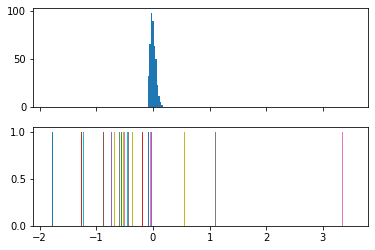

In [21]:
fig, axs = plt.subplots(2, 1, sharex = True)

axs[0].hist(raw)
axs[1].hist(z_scaled)

* max-min scaling: mejor para datos uniformemente distribuidos.
* z-score scaling: mejor para datos distribuidos"normalmente" (forma de campana de Gauss)

Utilidades de Scikit Learn : https://scikit-learn.org/stable/modules/preprocessing.html

#### Transformaciones no lineales

In [22]:
df = pd.read_csv('db/cars.csv')
df.sample(10)

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
29467,BMW,320,mechanical,blue,310000,2004,gasoline,False,gasoline,2.2,...,True,True,False,True,True,True,True,True,True,61
19001,Volkswagen,T5,mechanical,other,95000,2014,diesel,False,diesel,2.0,...,True,False,True,False,False,False,False,True,True,99
18101,Volkswagen,Polo Sedan,automatic,blue,19100,2018,gasoline,False,gasoline,1.6,...,True,False,True,False,True,False,True,False,True,48
18213,Volkswagen,Passat,mechanical,orange,280000,2004,diesel,False,diesel,1.9,...,True,True,False,True,True,False,False,True,True,44
14751,Seat,Altea,mechanical,grey,175000,2004,gasoline,False,gasoline,1.6,...,True,False,False,False,False,False,False,True,True,49
5982,Lancia,Lybra,mechanical,other,282000,2000,diesel,False,diesel,2.4,...,True,False,False,False,False,False,False,False,True,34
2293,Opel,Astra,mechanical,black,215323,2007,gasoline,False,gasoline,1.6,...,True,False,False,False,False,False,False,True,False,15
30008,BMW,530,mechanical,black,350000,2001,diesel,False,diesel,3.0,...,True,True,True,True,False,False,False,True,True,156
26927,Nissan,Qashqai,mechanical,silver,122000,2012,gasoline,False,gasoline,1.6,...,True,False,True,False,True,False,False,True,False,53
13298,Renault,Sandero,mechanical,black,58000,2013,gasoline,False,gasoline,1.6,...,True,False,False,False,False,False,False,False,True,129


<AxesSubplot:>

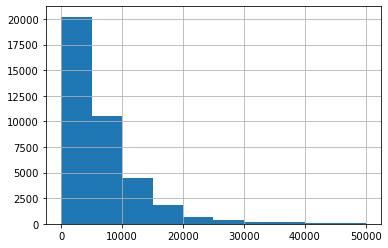

In [23]:
df.price_usd.hist()

Transformación con $$tanh(x)$$

<AxesSubplot:>

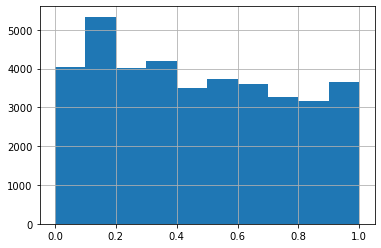

In [24]:
p = 10000
df.price_usd.apply(lambda x: np.tanh(x/p)).hist()

* mapear datos a una distribución gaussiana: https://scikit-learn.org/stable/auto_examples/preprocessing/plot_map_data_to_normal.html